Initial exploration of data after creating data set SQL
- property types of 11, 12, 14, 18 (only residential homes)
- sale instrument types of 2 or 3 (these are 'regular' real estate sale transactions)
- living area square footage 4500 or below (this was to eliminate extreme outliers based on size)
- sale price up to 2.5 million (this is based on prices being +-3 sd from the mean sale price)
- document dates Jan 1 2019 through December 31 2019 (year we are interested in analyzing)

Import packages needed

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

Create initial dataframe

In [2]:
df = pd.read_csv('../asp_original', index_col = 0)

In [3]:
df.head()

,documentdate,saleprice,propertytype,principaluse,saleinstrument,currentuseland,historicproperty,salereason,propertyclass,zipcode,...,waterfrontpoorqualtiy,waterfrontrestrictedaccess,waterfrontaccessrights,waterfrontproximityinfluence,tidelandshoreland,lotdepthfactopr,trafficnoise,airportnoise,powerlines,othernuisances
0,2019-04-01,1065000.0,12,6,3,N,N,1,8,98102.0,...,0,0,0,N,N,0.0,0,0,0,N
1,2019-05-04,890000.0,12,6,3,N,N,1,8,98011.0,...,0,0,0,N,N,0.0,0,1,0,N
2,2019-11-05,640000.0,11,6,3,N,N,1,8,98125.0,...,0,0,0,N,N,0.0,0,1,0,N
3,2019-01-25,645000.0,11,6,3,N,N,1,8,98028.0,...,0,0,0,N,N,0.0,0,1,0,N
4,2019-10-05,907000.0,11,6,3,N,N,1,8,98005.0,...,0,0,0,N,N,0.0,0,0,0,N


In [4]:
df.shape

(18182, 64)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18182 entries, 0 to 18181
Data columns (total 64 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   documentdate                  18182 non-null  object 
 1   saleprice                     18182 non-null  float64
 2   propertytype                  18182 non-null  int64  
 3   principaluse                  18182 non-null  int64  
 4   saleinstrument                18182 non-null  int64  
 5   currentuseland                18182 non-null  object 
 6   historicproperty              18182 non-null  object 
 7   salereason                    18182 non-null  int64  
 8   propertyclass                 18182 non-null  int64  
 9   zipcode                       15815 non-null  float64
 10  streettype                    18182 non-null  object 
 11  stories                       18182 non-null  float64
 12  buildinggrade                 18182 non-null  int64  
 13  s

there is a good number of homes without zipcode info, not really concerned with zipcode right now, so will leave it in.

In [6]:
df.describe()

,saleprice,propertytype,principaluse,saleinstrument,salereason,propertyclass,zipcode,stories,buildinggrade,squarefeettotalliving,...,waterfrontlocation,waterfrontfootage,waterfrontbank,waterfrontpoorqualtiy,waterfrontrestrictedaccess,waterfrontaccessrights,lotdepthfactopr,trafficnoise,airportnoise,powerlines
count,1.818200e+04,18182.000000,18182.0,18182.000000,18182.000000,18182.000000,15815.000000,18182.000000,18182.000000,18182.000000,...,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.0
mean,7.334650e+05,11.028655,6.0,2.998350,1.001870,7.993180,98065.602656,1.551754,7.610824,2051.980420,...,0.011715,0.073149,0.979265,0.015180,0.000440,0.004235,0.007645,0.030855,0.198603,0.0
std,3.686947e+05,0.311140,0.0,0.040588,0.178292,0.082303,1104.319049,0.558389,1.072843,807.581704,...,0.168876,0.736901,16.272133,0.163801,0.020972,0.096320,0.123196,1.583454,0.542554,0.0
min,5.000000e+03,11.000000,6.0,2.000000,1.000000,7.000000,98.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,4.690000e+05,11.000000,6.0,3.000000,1.000000,8.000000,98032.000000,1.000000,7.000000,1440.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,6.500000e+05,11.000000,6.0,3.000000,1.000000,8.000000,98059.000000,2.000000,7.000000,1930.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,8.800000e+05,11.000000,6.0,3.000000,1.000000,8.000000,98118.000000,2.000000,8.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,2.498000e+06,18.000000,6.0,3.000000,18.000000,8.000000,98812.000000,4.000000,12.000000,4490.000000,...,4.000000,9.000000,1610.000000,3.000000,1.000000,3.000000,3.000000,96.000000,3.000000,0.0


Let's take a look at some of the features in the dataset

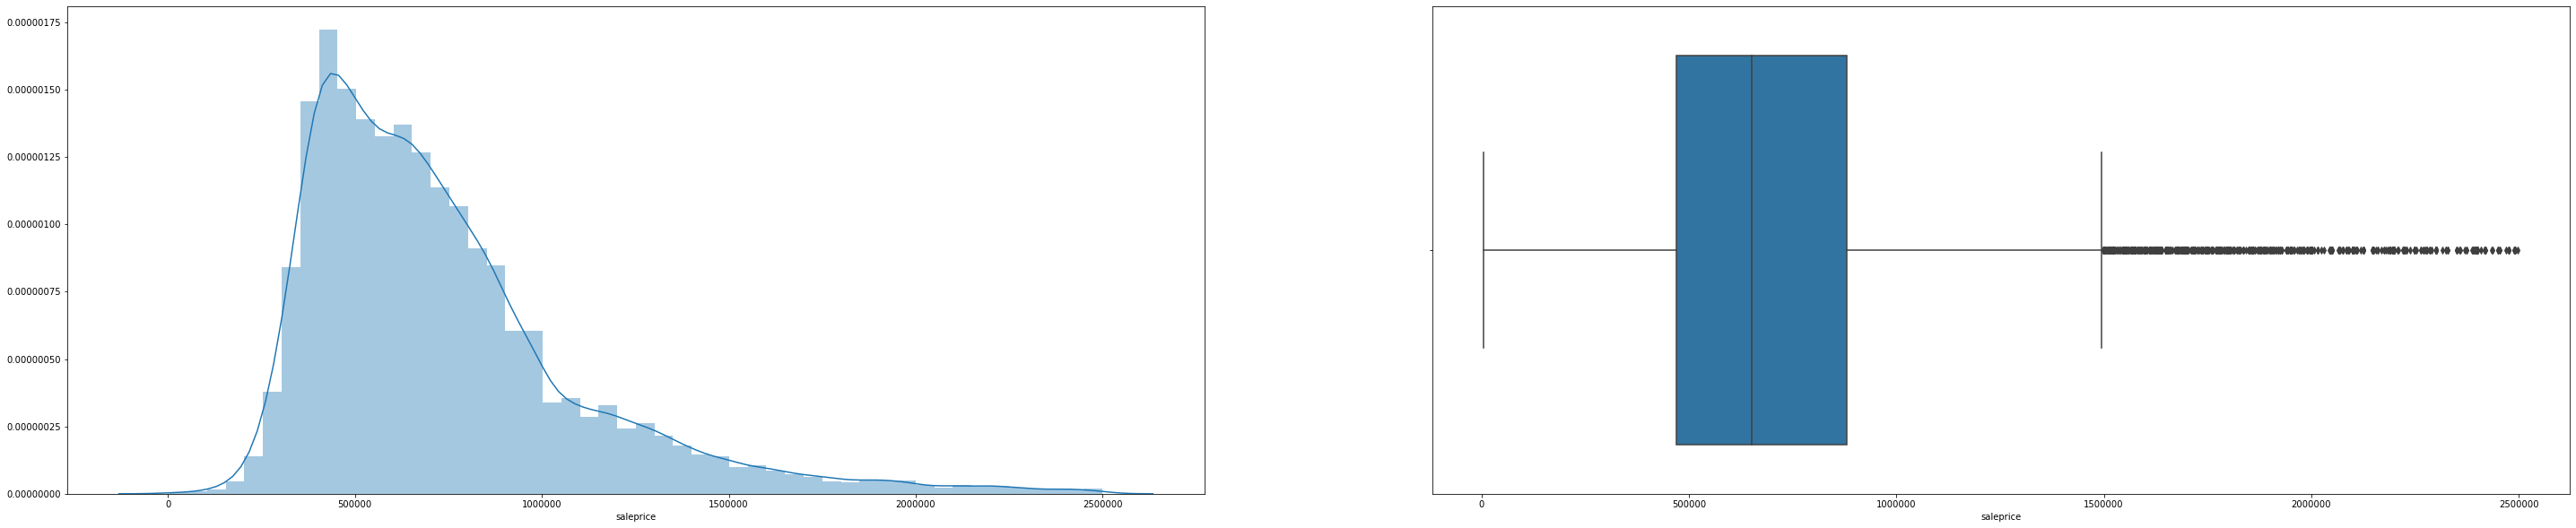

In [7]:
#saleprice is the target variable for our analysis, let's see what the distribution looks like
fig, ax = plt.subplots(1,2, figsize=(50,10))
sns.distplot(df.saleprice, ax = ax[0])
sns.boxplot(df.saleprice, ax= ax[1]);

the data is still skewed, but the shape is good

In [8]:
df[['saleprice','buildinggrade','zipcode','squarefeettotalliving','waterfrontlocation']].corr()

,saleprice,buildinggrade,zipcode,squarefeettotalliving,waterfrontlocation
saleprice,1.000000,0.616371,-0.035166,0.596841,0.057722
buildinggrade,0.616371,1.000000,-0.023614,0.709274,0.047023
zipcode,-0.035166,-0.023614,1.000000,-0.034323,-0.000871
squarefeettotalliving,0.596841,0.709274,-0.034323,1.000000,0.047343
waterfrontlocation,0.057722,0.047023,-0.000871,0.047343,1.000000


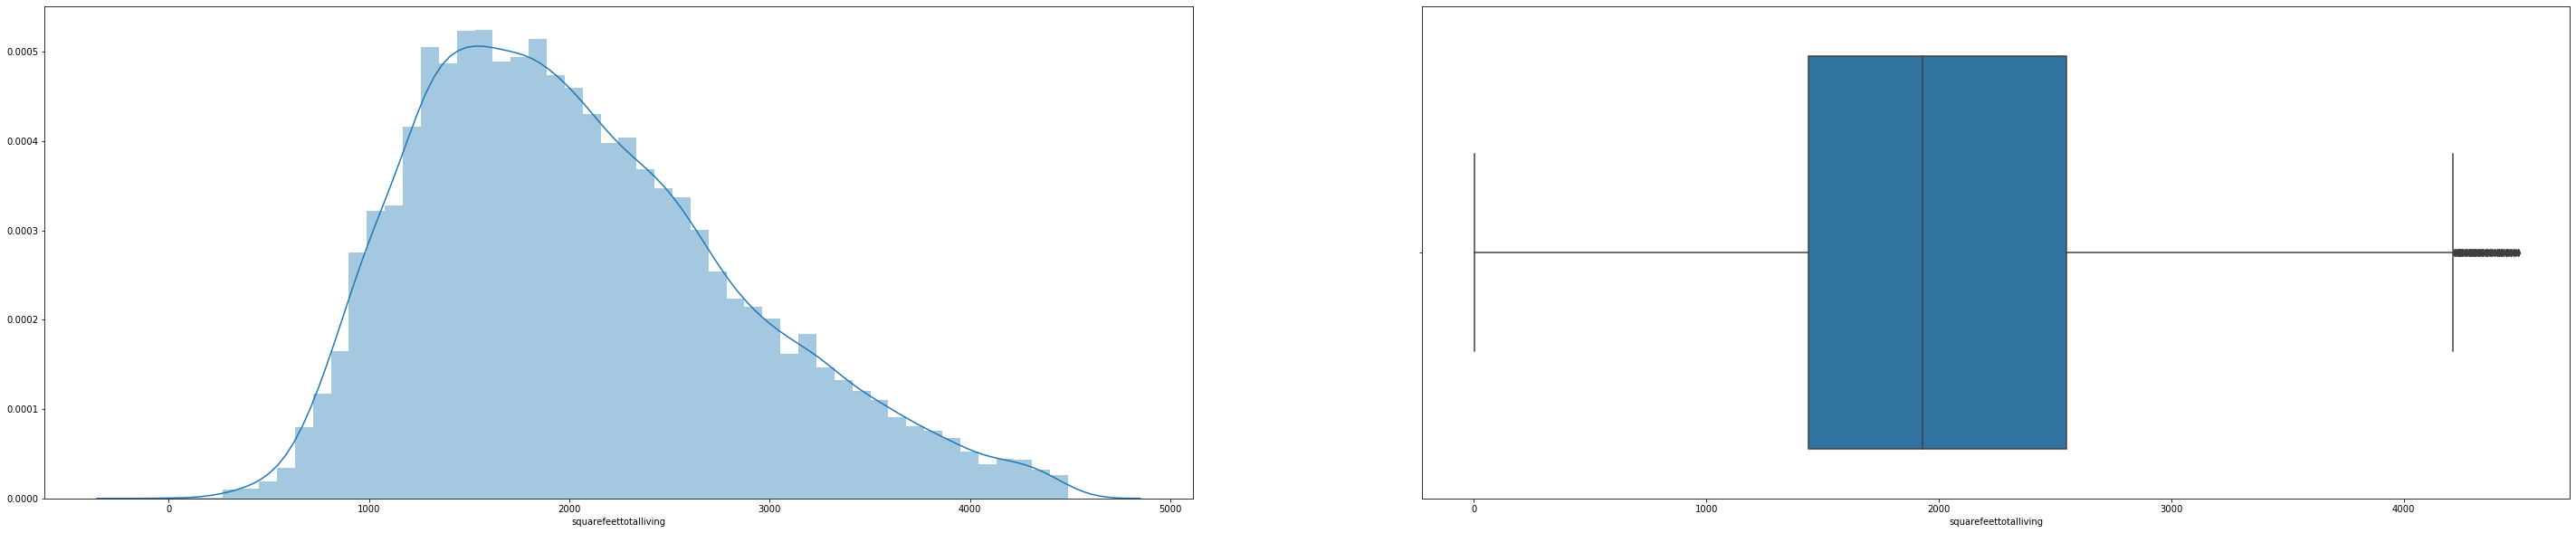

In [9]:
#total living area square footage looks like it correlates with price as does building grade
fig, ax = plt.subplots(1,2, figsize=(50,10))
sns.distplot(df.squarefeettotalliving, ax = ax[0])
sns.boxplot(df.squarefeettotalliving, ax= ax[1]);

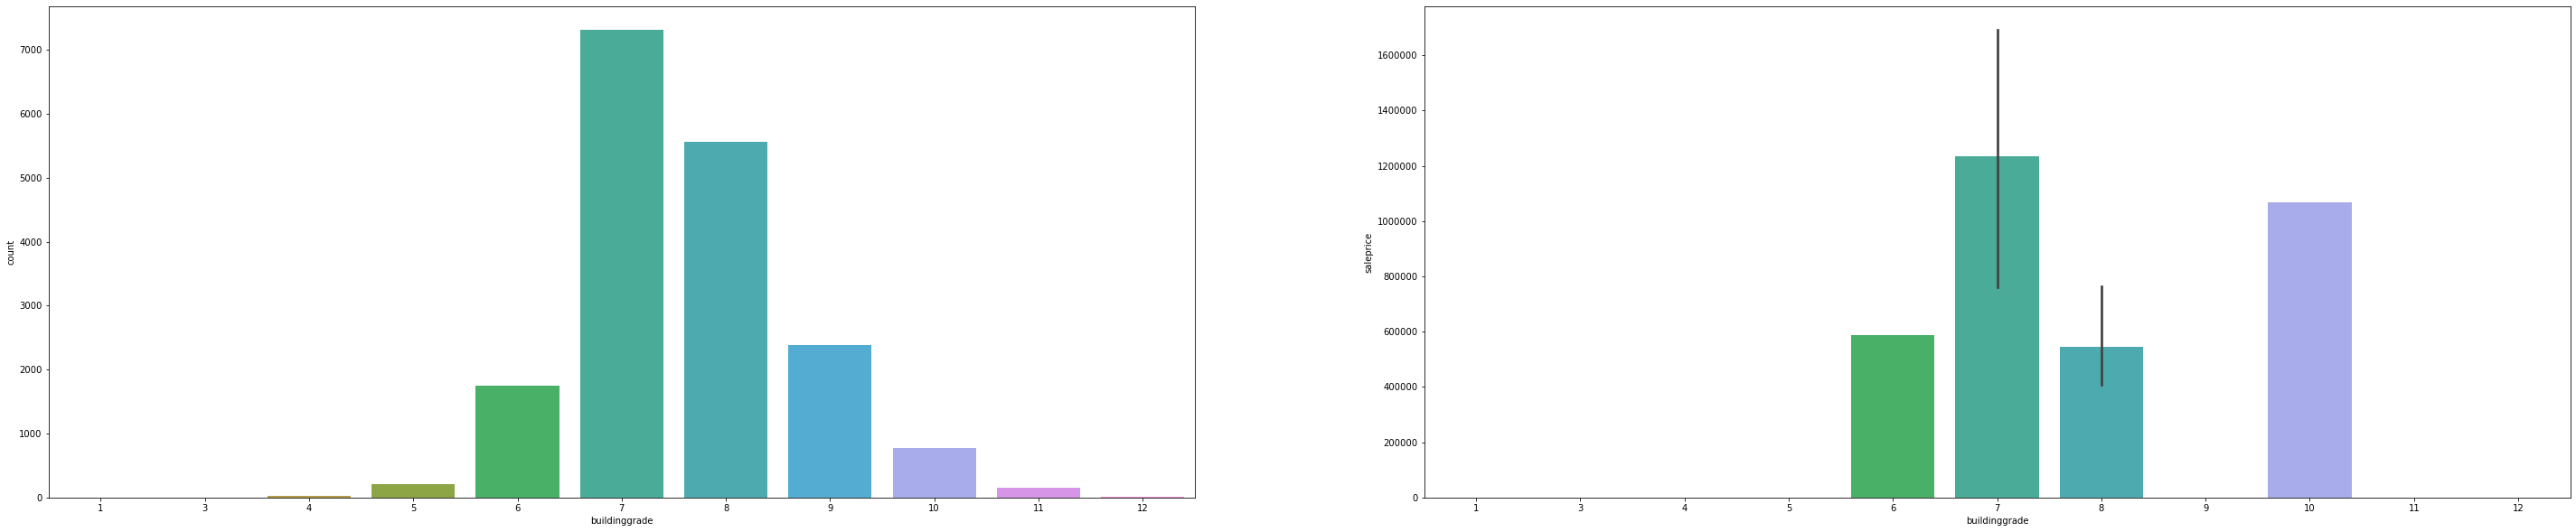

In [10]:
#what does the dist of building grade look like?

mean = df.saleprice.groupby(df['buildinggrade']).mean()
grade = df.buildinggrade

fig, ax = plt.subplots(1,2, figsize=(50,10))
sns.countplot(df.buildinggrade, ax = ax[0])
sns.barplot(grade,mean, ax = ax[1]);

looks like most sales are of homes with gradeof 7 and 8 - the highest mean sale price is seen in grades 7 and 10

In [11]:
df[['saleprice','squarefeetdeck','squarefeetopenporch','squarefeetenclosedporch']].corr()

,saleprice,squarefeetdeck,squarefeetopenporch,squarefeetenclosedporch
saleprice,1.000000,0.202800,0.206762,0.006293
squarefeetdeck,0.202800,1.000000,-0.034366,0.017801
squarefeetopenporch,0.206762,-0.034366,1.000000,-0.019317
squarefeetenclosedporch,0.006293,0.017801,-0.019317,1.000000


these features don't look to have a strong correlation to sale price.  Do they correlate with living space square footage?

In [12]:
df[['squarefeettotalliving','squarefeetdeck','squarefeetopenporch','squarefeetenclosedporch']].corr()

,squarefeettotalliving,squarefeetdeck,squarefeetopenporch,squarefeetenclosedporch
squarefeettotalliving,1.000000,0.204983,0.290573,-0.025661
squarefeetdeck,0.204983,1.000000,-0.034366,0.017801
squarefeetopenporch,0.290573,-0.034366,1.000000,-0.019317
squarefeetenclosedporch,-0.025661,0.017801,-0.019317,1.000000


not much better.  How about year built or year renovated?

In [13]:
df[['saleprice','yearbuilt','yearrenovated','squarefeettotalliving']].corr()

,saleprice,yearbuilt,yearrenovated,squarefeettotalliving
saleprice,1.000000,0.074909,0.101951,0.596841
yearbuilt,0.074909,1.000000,-0.250740,0.347701
yearrenovated,0.101951,-0.250740,1.000000,0.029330
squarefeettotalliving,0.596841,0.347701,0.029330,1.000000


year built looks to be correlated with square footage, but not sale price.  How about condition?

In [14]:
df[['saleprice','condition','squarefeettotalliving']].corr()

,saleprice,condition,squarefeettotalliving
saleprice,1.000000,-0.039693,0.596841
condition,-0.039693,1.000000,-0.091055
squarefeettotalliving,0.596841,-0.091055,1.000000


Condition doesn't seem to show much correlation, but what does the category look like

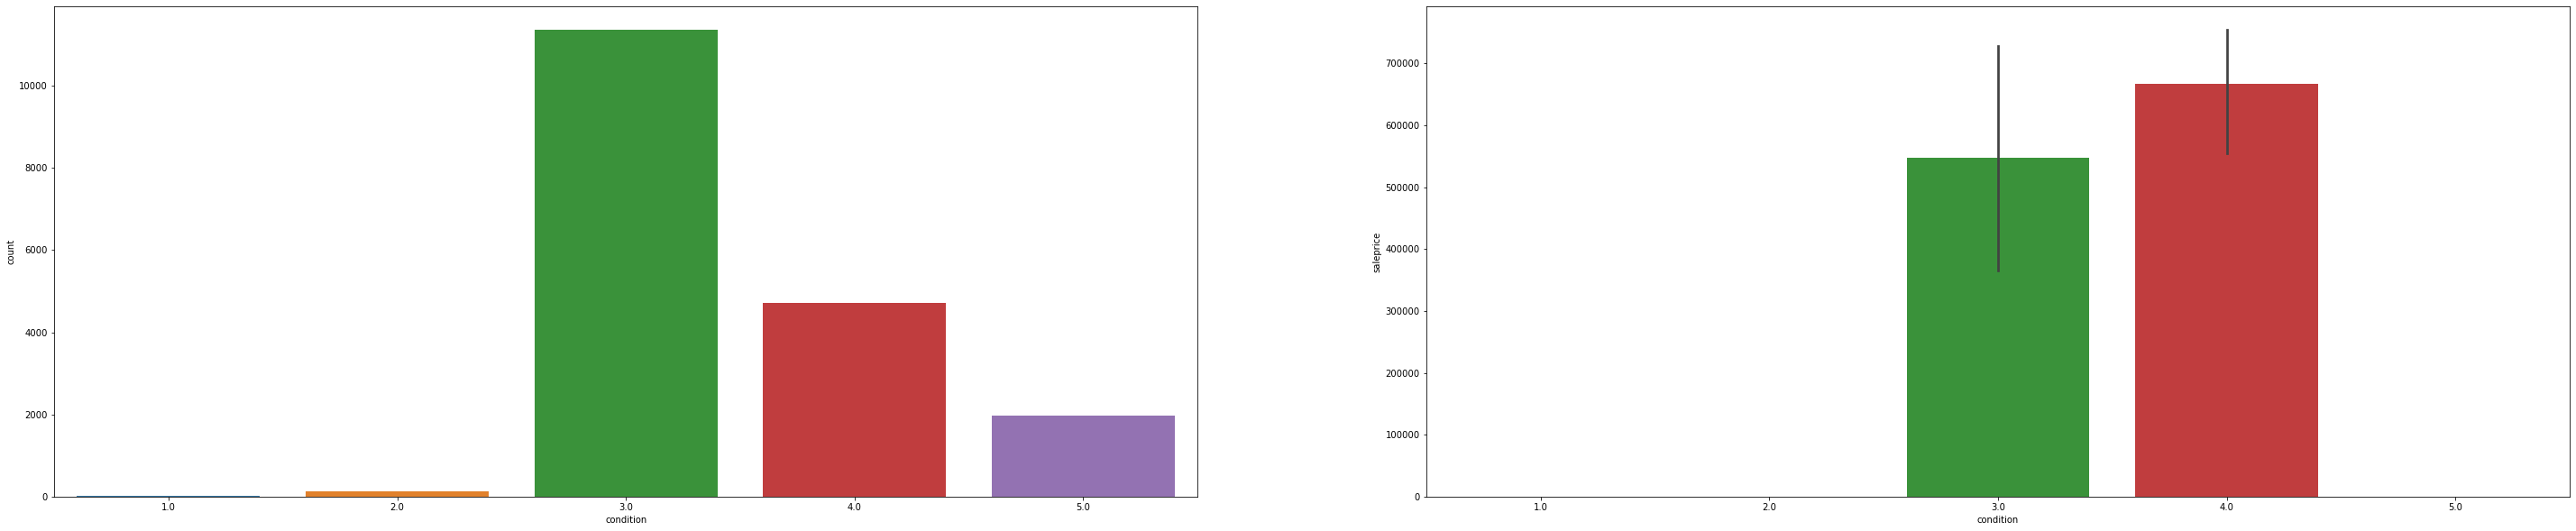

In [15]:
mean = df.saleprice.groupby(df['condition']).mean()
condition = df.condition

fig, ax = plt.subplots(1,2, figsize=(50,10))
sns.countplot(df.condition, ax = ax[0])
sns.barplot(condition,mean, ax = ax[1]);

makes sense, the vast majority of homes sold fall into the same condition category (3) and there isn't much difference in the mean sale price between categories

What about other features like bathrooms and bedrooms?

In [16]:
df[['saleprice','bedrooms','bathfullcount','squarefeettotalliving']].corr()

,saleprice,bedrooms,bathfullcount,squarefeettotalliving
saleprice,1.000000,0.285509,0.314990,0.596841
bedrooms,0.285509,1.000000,0.421071,0.634902
bathfullcount,0.314990,0.421071,1.000000,0.547144
squarefeettotalliving,0.596841,0.634902,0.547144,1.000000


this makes sense, there is a much higher correlation with living square footage than with sale price.  Larger homes tend to have more bedrooms and full bathrooms and larger homes are also more expensive.

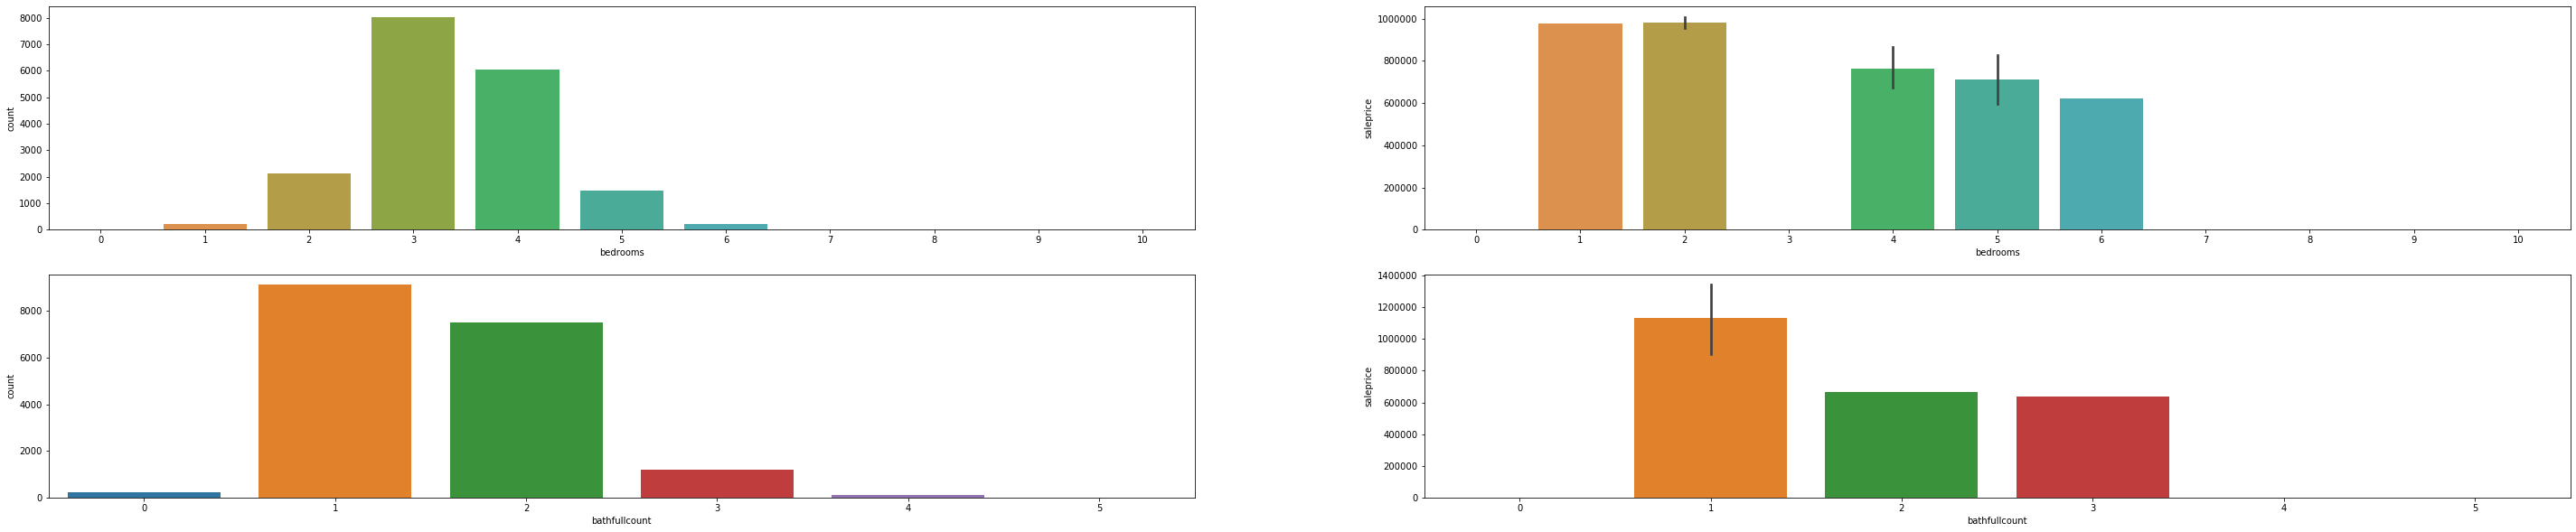

In [17]:
bdmean = df.saleprice.groupby(df['bedrooms']).mean()
bed = df.bedrooms
bamean = df.saleprice.groupby(df['bathfullcount']).mean()
bath = df.bathfullcount

fig, ax = plt.subplots(2,2, figsize=(50,10))
sns.countplot(bed, ax = ax[0,0])
sns.barplot(bed,bdmean, ax = ax[0,1])
sns.countplot(bath, ax = ax[1,0])
sns.barplot(bath,bamean, ax = ax[1,1]);

looks like a fair number of homes are 3-4 beds with 1-2 baths - oddly there is no mean for 3 bed home sales what's up with that?

In [18]:
bdmean

bedrooms
0     6.446435e+05
1     6.205956e+05
2     5.946774e+05
3     6.556595e+05
4     8.271770e+05
5     9.539549e+05
6     9.560224e+05
7     9.763375e+05
8     7.549500e+05
9     1.006667e+06
10    8.060000e+05
Name: saleprice, dtype: float64

looks like the plot is not rendering correctly. Let's keep exploring

In [19]:
df[['saleprice','township','squarefeettotalliving']].corr()

,saleprice,township,squarefeettotalliving
saleprice,1.000000,0.460482,0.596841
township,0.460482,1.000000,0.049027
squarefeettotalliving,0.596841,0.049027,1.000000


township might be interesting to look at - it appears to be correlated with both sale price and square footage fairly equally.  Let's see

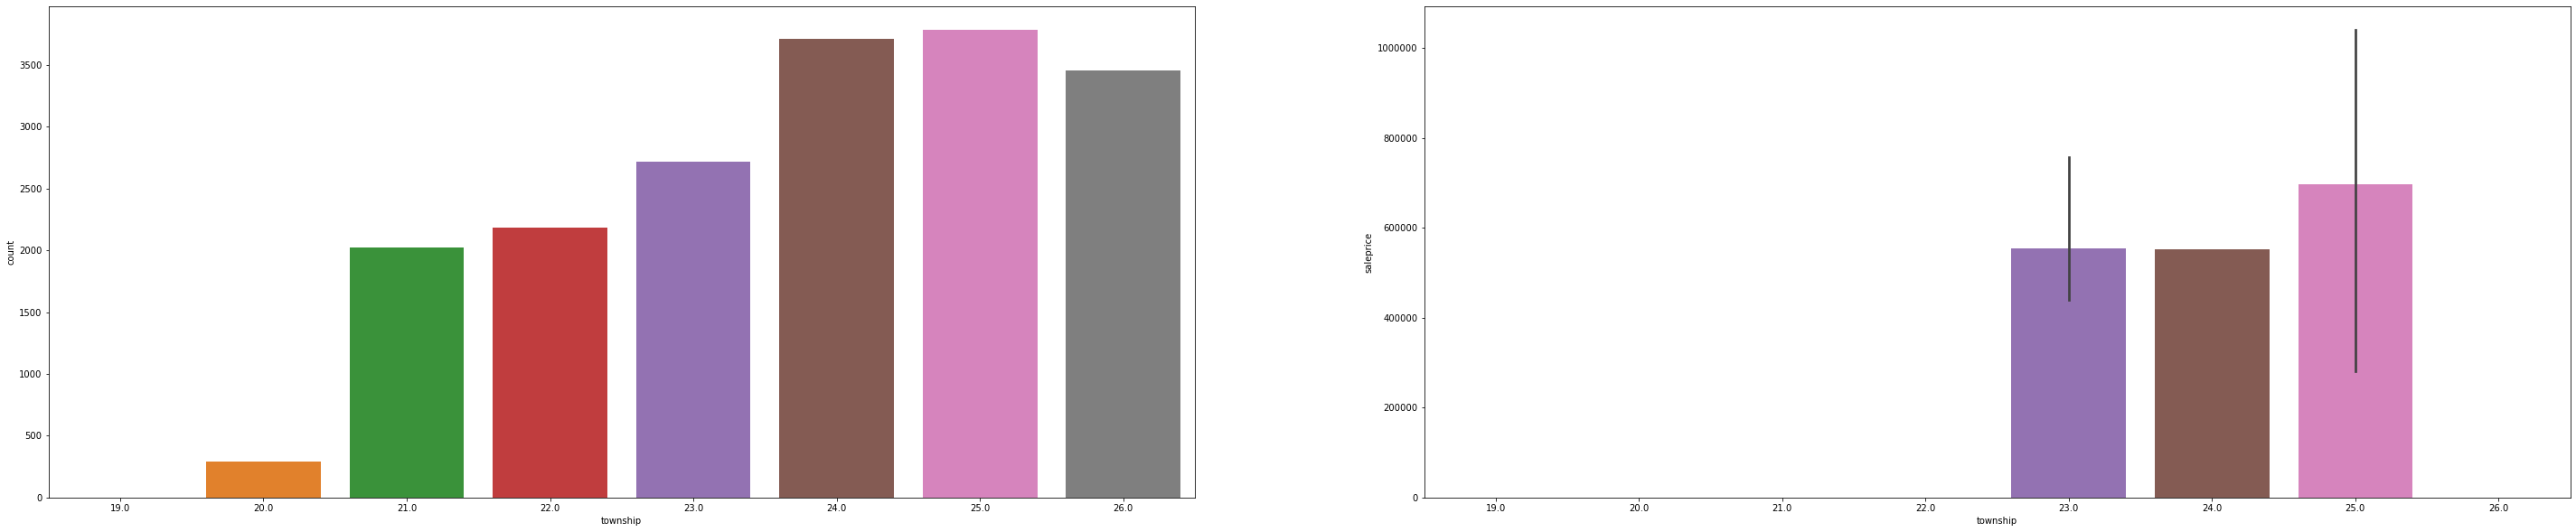

In [20]:
mean = df.saleprice.groupby(df['township']).mean()
twn = df.township

fig, ax = plt.subplots(1,2, figsize=(50,10))
sns.countplot(twn, ax = ax[0])
sns.barplot(twn,mean, ax = ax[1]);

In [21]:
mean

township
19.0    2.806250e+05
20.0    4.470860e+05
21.0    4.330838e+05
22.0    4.752863e+05
23.0    5.515511e+05
24.0    8.602265e+05
25.0    1.040135e+06
26.0    7.679675e+05
Name: saleprice, dtype: float64

townships 24,25,and 26 have a much higher mean sale price.  19 loks to be quite a bit lower.  Let's see if these are real differences.

In [22]:
df.township.value_counts()

25.0    3785
24.0    3715
26.0    3460
23.0    2720
22.0    2188
21.0    2023
20.0     289
19.0       2
Name: township, dtype: int64

so, 19 only has 2 home sales, so that wouldn't be enough to meaningfully compare to anything, 20 also has a very small number not sure how meaningful that might be - will determine later.  24,25,and 26 actually have more homes sold than 21,22,23.  this might be interesting to explore further

how about a t-test!  we will group 21,22,23 into one group, and 24,25,26 into the second to see if the higher mean sale price in the second group is really different that the other group

In [23]:
town = df[['saleprice','township']]

t_high = (24,25,26)
t_low = (21,22,23)

townhigh = town[town.township.isin(t_high)]
townlow = town[town.township.isin(t_low)]

print(townhigh.shape)
print(townlow.shape)

(10960, 2)
(6931, 2)


In [24]:
from scipy.stats import ttest_ind

townhigh = townhigh.saleprice
townlow = townlow.saleprice
#df is equal to n of sample 1-1 + n of sample 2 -1
df = (len(townhigh)-1) + (len(townlow)-1)
# the alpha value we are using for this test is .05, because it is one-sided we only need the value below .95
critical_tstat_below = stats.t.ppf(.95,df)
print(f'critical_t_stat: {critical_tstat_below}')

ttest_result = ttest_ind(townhigh,townlow, equal_var=False)
print(f'test t-stat: {ttest_result.statistic}')
#because the pvalue generated for this would be 2-way, we need to divide by 2 to get the correct pvalue
print(f'pvalue - {ttest_result.pvalue/2}')

critical_t_stat: 1.6449388105022789
test t-stat: 95.90200422557332
pvalue - 0.0


it does not appear that we can reject the NULL hypothesis here (NULL = the townhigh group mean sale price is less than or equal to the townlow group mean sale price)

let's take one more look at out correlation matrix

In [26]:
df = pd.read_csv('../asp_original', index_col = 0)
df[['saleprice','squarefeettotalliving','buildinggrade','township','waterfrontlocation','airportnoise','waterfrontfootage']].corr()

,saleprice,squarefeettotalliving,buildinggrade,township,waterfrontlocation,airportnoise,waterfrontfootage
saleprice,1.000000,0.596841,0.616371,0.460482,0.057722,0.005926,0.078874
squarefeettotalliving,0.596841,1.000000,0.709274,0.049027,0.047343,-0.065718,0.021053
buildinggrade,0.616371,0.709274,1.000000,0.144453,0.047023,-0.057989,0.004425
township,0.460482,0.049027,0.144453,1.000000,0.003778,0.084417,-0.039465
waterfrontlocation,0.057722,0.047343,0.047023,0.003778,1.000000,-0.006785,0.041732
airportnoise,0.005926,-0.065718,-0.057989,0.084417,-0.006785,1.000000,-0.005798
waterfrontfootage,0.078874,0.021053,0.004425,-0.039465,0.041732,-0.005798,1.000000


it looks like our best candidates for the first model are squarefeettotalliving, buildinggrade, township.  
To keep this a bit cleaner, I am going to start a new notebook to build the model 